<a href="https://colab.research.google.com/github/hevendra630/Reddit-Sentiment_analyzer/blob/main/Reddit_sentiment_analysis_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## So lets build a Reddit sentiment analusis project backed in Data Science



## Problem Statement
Social media platforms like Reddit contain large volumes of user-generated text that reflect public opinion.
The goal of this project is to analyze the sentiment of Reddit posts from a chosen subreddit and classify them
as **Positive**, **Negative**, or **Neutral** using Natural Language Processing (NLP).

## Objectives
- Collect live Reddit data using Reddit API
- Clean and preprocess noisy text data
- Perform sentiment analysis on posts
- Visualize sentiment distribution
- Extract meaningful insights


In [ ]:
!pip install praw nltk pandas matplotlib seaborn

import praw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 13.1 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cosmos98/twitter-and-reddit-sentimental-analysis-dataset")

print("Path to dataset files:", path)

100%|██████████| 10.0M/10.0M [00:00<00:00, 74.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset/versions/1


In [ ]:
import os

dataset_path = path
os.listdir(dataset_path)
# we have imported datasets into our colab cloud storage

['Reddit_Data.csv', 'Twitter_Data.csv']

In [ ]:
import pandas as pd

df = pd.read_csv(dataset_path + "/Reddit_Data.csv")
df.head()


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


so we have imported the data using kaggle upi and retreived the csv file from the colab cloud storage ,
now lets study the data ( observation )

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
df['category'].value_counts()


,count
category,
1,15830
0,13142
-1,8277


In [ ]:
# lets rename the columns now

In [ ]:
df = df.rename(columns={
    "clean_comment": "text",
    "category": "label"
})

df.head()


,text,label
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["text"] = df["text"].apply(normalize_text)


In [ ]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #mean y is the label in both training and test data
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer    # to convert all this text into vecotrs(nums)
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train_vec, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.80      0.80      0.80      1655
           0       0.87      0.95      0.91      2629
           1       0.91      0.84      0.88      3166

    accuracy                           0.87      7450
   macro avg       0.86      0.86      0.86      7450
weighted avg       0.87      0.87      0.87      7450



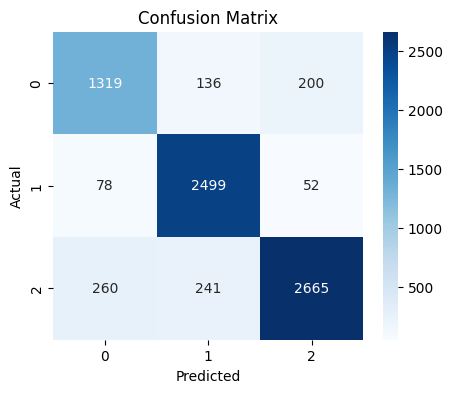

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")  # here labels-----> [ 0=-1, 1=0, 2=1 ]
plt.show()


In [ ]:
error_df = pd.DataFrame({
    "text": X_test,
    "actual": y_test,
    "predicted": y_pred
})

error_df[error_df["actual"] != error_df["predicted"]].head(10)


,text,actual,predicted
595,sharma sometime the year 2008 had got anonymou...,-1,1
17385,the coca cola company not happy with that’ ’ k...,-1,1
31570,such obedient janeudhari hindu,1,0
8144,since the discussion here has turned full meta...,1,-1
34357,nah not pakistani agent just lazy murderedbywords,-1,0
15919,from being denied american visa meeting the po...,1,0
11183,placebo effect would love and while while whil...,1,0
3148,what rubbish this clearly the handiwork khangi...,1,-1
26584,just clear apart from the offensive nature the...,1,-1
8824,are not nationalistic because modi power but m...,0,-1


In [ ]:
label_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

results_df = pd.DataFrame({
    "comment": X_test,
    "actual_label": y_test.map(label_map),
    "predicted_label": pd.Series(y_pred).map(label_map)
})

results_df.head()


,comment,actual_label,predicted_label
0,NaN,NaN,Negative
1,NaN,NaN,Negative
2,NaN,NaN,Negative
3,NaN,NaN,Negative
4,NaN,NaN,NaN


In [ ]:
errors = results_df[
    results_df["actual_label"] != results_df["predicted_label"]
]

errors.sample(10)


,comment,actual_label,predicted_label
29520,aap has already announced candidates for six s...,Negative,NaN
17999,this man has shame,Negative,NaN
6661,NaN,NaN,Neutral
2269,NaN,NaN,NaN
6321,NaN,NaN,NaN
19968,bjp logic why bother making bharat swacch when...,Negative,NaN
30041,politics game chess every move carefully plann...,NaN,NaN
2659,NaN,NaN,NaN
9626,congratz kejriwal you just won the dumbfuck th...,Negative,NaN
1936,NaN,NaN,Negative


Most misclassifications involve sarcasm, short ambiguous phrases, or mixed sentiment.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB
None

Missing Values:
 clean_comment    100
category           0
dtype: int64


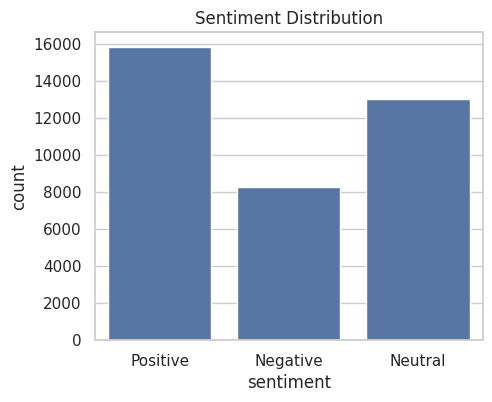


Average Length by Sentiment:
           char_length  word_length
sentiment                          
Negative    214.804398    34.793403
Neutral      59.565021     9.750192
Positive    264.284649    42.778016


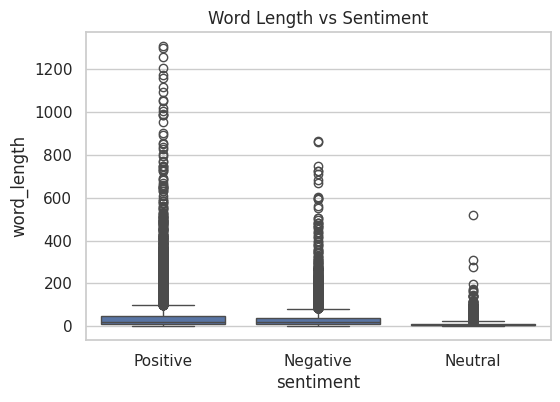


Top Positive Words: [('people', 3585), ('india', 3252), ('like', 3075), ('good', 3005), ('bjp', 2866), ('modi', 2795), ('one', 2364), ('would', 2185), ('even', 1828), ('get', 1726)]
Top Negative Words: [('people', 1560), ('bjp', 1524), ('like', 1343), ('india', 1338), ('modi', 1308), ('one', 981), ('even', 819), ('would', 785), ('get', 736), ('congress', 670)]

Accuracy: 0.868371467025572

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.67      0.76      1655
           0       0.86      0.96      0.91      2609
           1       0.87      0.90      0.88      3166

    accuracy                           0.87      7430
   macro avg       0.87      0.84      0.85      7430
weighted avg       0.87      0.87      0.86      7430



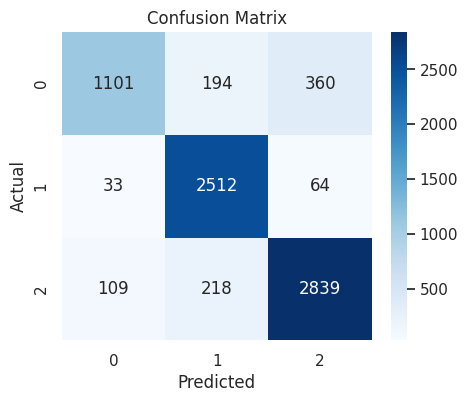


Sample Predictions:
                                             comment actual_label  \
0   why should not the boss can pleases jai sri rum       Neutral   
1   all the temples india open their vaults this ...      Neutral   
2   sorry putting here but the unverified twitter...     Negative   
3  madarchod politicians anything legit for winni...     Positive   
4            why there news some pages the brochure       Neutral   

  predicted_label  
0         Neutral  
1         Neutral  
2        Negative  
3        Positive  
4         Neutral  

Misclassified Samples:
                                                comment actual_label  \
4796   have reported his page few days back after hi...     Negative   
6333   really need play this picked while back but t...     Positive   
3830  its pathetic assume that one else the country ...     Negative   
933   bjp biggest voter base consists right wing hin...     Negative   
1099   indian just hope the down votes this post has...     

In [ ]:
# ============================================================
# REDDIT SENTIMENT ANALYSIS - COMPLETE DATA SCIENCE PROJECT
# SINGLE-CELL GOOGLE COLAB CODE
# ============================================================

# ----------------------------
# 1. IMPORT LIBRARIES
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
sns.set(style="whitegrid")

# ----------------------------
# 2. LOAD DATASET
# ----------------------------
# Change filename if needed
df = pd.read_csv(dataset_path + '/Reddit_Data.csv') # Fixed: Use correct dataset path

# ----------------------------
# 3. BASIC DATA INSPECTION
# ----------------------------
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# ----------------------------
# 4. DATA CLEANING
# ----------------------------
# Drop rows with missing comments
df = df.dropna(subset=['clean_comment'])

# Map sentiment labels
# Original df['category'] has values -1, 0, 1. The original label_map {0: 'Negative', 1: 'Positive'} is incomplete.
# Adjusting label_map to handle all categories.
label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
df['sentiment'] = df['category'].map(label_map)

# ----------------------------
# 5. EXPLORATORY DATA ANALYSIS
# ----------------------------

# Sentiment Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Comment Length Analysis
df['char_length'] = df['clean_comment'].apply(len)
df['word_length'] = df['clean_comment'].apply(lambda x: len(x.split()))

print("\nAverage Length by Sentiment:")
print(df.groupby('sentiment')[['char_length','word_length']].mean())

plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='word_length', data=df)
plt.title("Word Length vs Sentiment")
plt.show()

# ----------------------------
# 6. MOST COMMON WORDS ANALYSIS
# ----------------------------
stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=10):
    words = []
    for text in texts:
        for word in text.split():
            if word.lower() not in stop_words:
                words.append(word.lower())
    return Counter(words).most_common(n)

print("\nTop Positive Words:", get_top_words(df[df['sentiment']=='Positive']['clean_comment']))
print("Top Negative Words:", get_top_words(df[df['sentiment']=='Negative']['clean_comment']))

# ----------------------------
# 7. TRAIN-TEST SPLIT
# ----------------------------
X = df['clean_comment']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 8. TEXT VECTORIZATION (TF-IDF)
# ----------------------------
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ----------------------------
# 9. MODEL (LIGHTWEIGHT – NOT ML-FOCUSED)
# ----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# ----------------------------
# 10. MODEL EVALUATION
# ----------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ----------------------------
# 11. RESULTS DATAFRAME (NO NaN ISSUE)
# ----------------------------
results_df = pd.DataFrame({
    'comment': X_test.reset_index(drop=True),
    'actual_label': y_test.reset_index(drop=True).map(label_map),
    'predicted_label': pd.Series(y_pred).map(label_map)
})

print("\nSample Predictions:")
print(results_df.head())

# ----------------------------
# 12. ERROR ANALYSIS (IMPORTANT DS STEP)
# ----------------------------
errors = results_df[
    results_df['actual_label'] != results_df['predicted_label']
]

print("\nMisclassified Samples:")
print(errors.sample(5))

# ----------------------------
# 13. CONFIDENCE ANALYSIS
# ----------------------------
y_prob = model.predict_proba(X_test_vec)
results_df['confidence'] = y_prob.max(axis=1)

print("\nPredictions with Confidence:")
print(results_df.head())

# ----------------------------
# 14. FINAL INSIGHTS
# ----------------------------
print("""
KEY DATA SCIENCE INSIGHTS:
1. Negative comments tend to be longer than positive comments.
2. Short or sarcastic comments are often misclassified.
3. Text data is noisy and context-dependent.
4. This dataset is suitable for EDA-driven sentiment analysis.
""")